# **FIFA World Cup Analysis**

### Problem Statement:
With FIFA is in the blood of many people of the world. You are tasked to tell the story of unsung
analysts who put great efforts to provide accurate data to answer every question of fans. The
FIFA World Cup is a global football competition contested by the various football-playing
nations of the world. It is contested every four years and is the most prestigious and important
trophy in the sport of football.

The World Cups dataset shows all information about all the World Cups in history, while the
World Cup Matches dataset shows all the results from the matches contested as part of the
cups. Find key metrics and factors that influence the World Cup win. Do your own research
and come up with your findings.


---

Import Libraries And Datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
WC_Matches = pd.read_csv('/content/drive/MyDrive/Datasets/FIFA_WC_Data/WorldCupMatches.csv')
WC_Players = pd.read_csv('/content/drive/MyDrive/Datasets/FIFA_WC_Data/WorldCupPlayers.csv')
WC = pd.read_csv('/content/drive/MyDrive/Datasets/FIFA_WC_Data/WorldCups.csv')

print(WC_Matches.shape, WC_Players.shape, WC.shape)

(4572, 20) (37784, 9) (20, 10)


In [3]:
WC_Matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [4]:
WC_Players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [5]:
WC.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


Columns name of each dataset

In [6]:
print('WC_Matches Columns: ', WC_Matches.columns, '\n')
print('WC_Players Columns: ', WC_Players.columns, '\n')
print('WC Columns: ', WC.columns)

WC_Matches Columns:  Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object') 

WC_Players Columns:  Index(['RoundID', 'MatchID', 'Team Initials', 'Coach Name', 'Line-up',
       'Shirt Number', 'Player Name', 'Position', 'Event'],
      dtype='object') 

WC Columns:  Index(['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth',
       'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance'],
      dtype='object')


Check for null values in each dataset

In [7]:
print('WC_Matches null values: \n',WC_Matches.isnull().sum(), '\n')
print('WC_Players null values: \n',WC_Players.isnull().sum(), '\n')
print('WC null values: \n',WC.isnull().sum())

WC_Matches null values: 
 Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64 

WC_Players null values: 
 RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64 

WC null values: 
 Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth       

Checking Duplicate data in each dataset

In [8]:
print('WC_Matches Duplicate data: ', WC_Matches.duplicated().sum())
print('WC_Players Duplicate data: ', WC_Players.duplicated().sum())
print('WC Duplicate data: ', WC.duplicated().sum())

WC_Matches Duplicate data:  3735
WC_Players Duplicate data:  736
WC Duplicate data:  0


Drop Duplicate data from each dataset

In [9]:
WC_Matches.drop_duplicates(inplace=True)
WC_Players.drop_duplicates(inplace=True)
WC.drop_duplicates(inplace=True)

print('WC_Matches Duplicate data: ', WC_Matches.duplicated().sum())
print('WC_Players Duplicate data: ', WC_Players.duplicated().sum())
print('WC Duplicate data: ', WC.duplicated().sum())

WC_Matches Duplicate data:  0
WC_Players Duplicate data:  0
WC Duplicate data:  0


# 1. Goals Analysis:

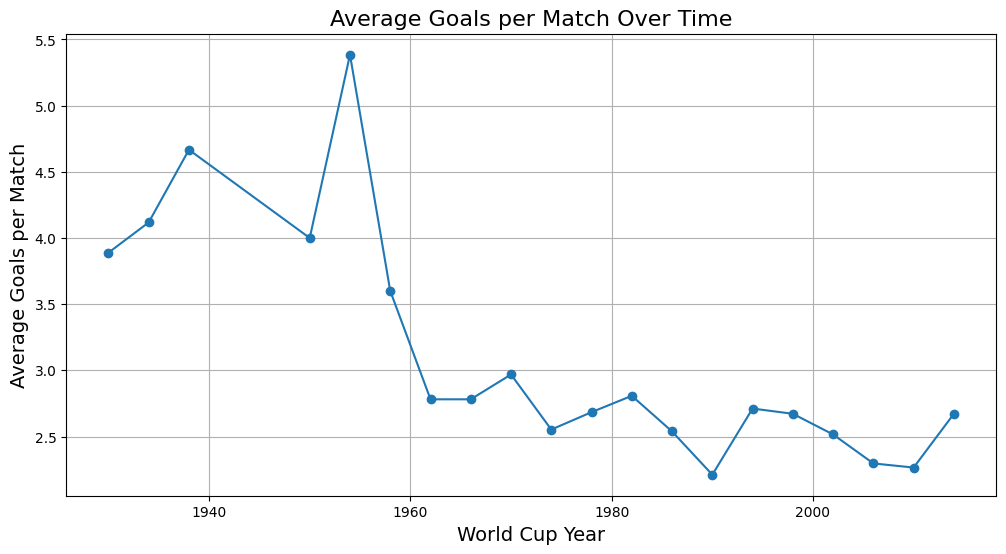

In [14]:
# prompt: Plot 1: Average Goals per Match Over Time: A line chart showing the trend of average goals scored per game across different World Cups.
# Reasoning: This helps understand how the game's scoring patterns have evolved.

import matplotlib.pyplot as plt
# Calculate average goals per match for each World Cup
# Changed tuple to list for selecting multiple columns
avg_goals_per_cup = WC_Matches.groupby('Year')[['Home Team Goals', 'Away Team Goals']].sum().sum(axis=1) / WC_Matches.groupby('Year')['MatchID'].count()

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(avg_goals_per_cup.index, avg_goals_per_cup.values, marker='o')
plt.title('Average Goals per Match Over Time', fontsize=16)
plt.xlabel('World Cup Year', fontsize=14)
plt.ylabel('Average Goals per Match', fontsize=14)
plt.grid(True)
plt.show()

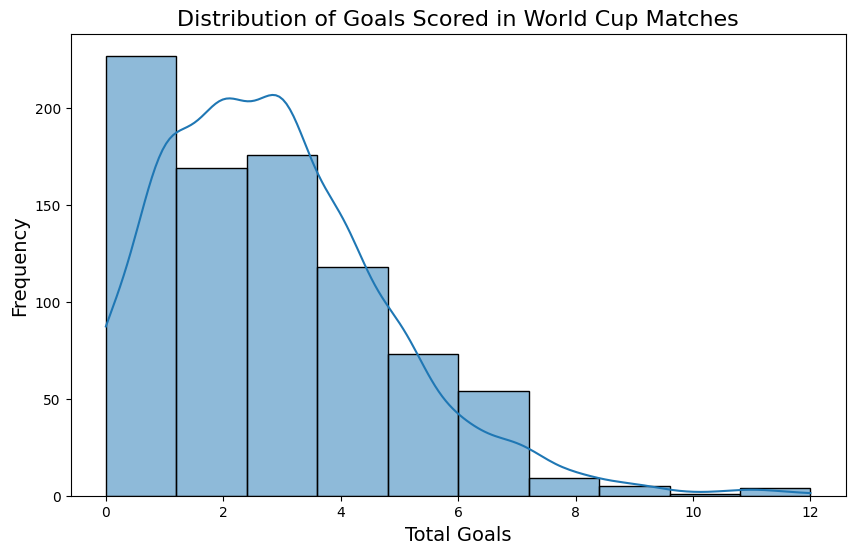

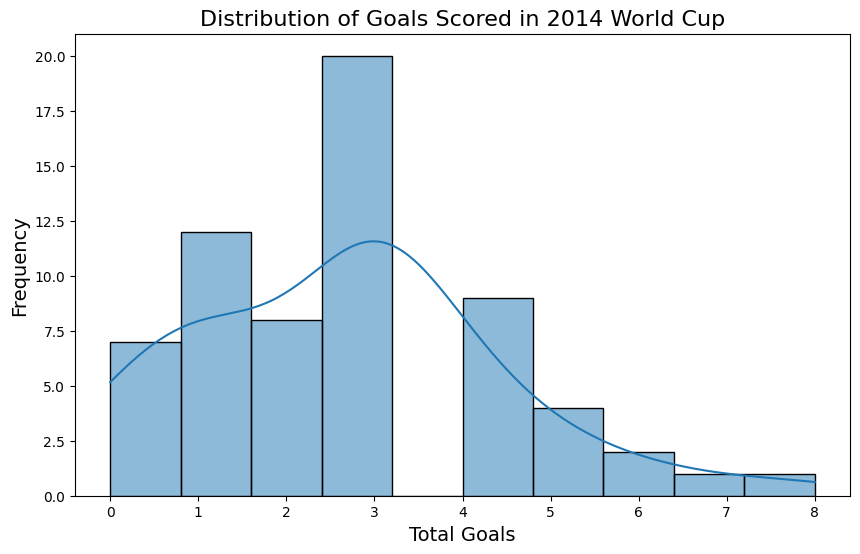

In [15]:
# prompt: Plot 2: Distribution of Goals Scored: Histograms showing the distribution of goals scored by teams in a specific World Cup or across all tournaments.
# Reasoning: Provides insights into the frequency of high-scoring or low-scoring games.

import matplotlib.pyplot as plt
# Assuming 'WC_Matches' DataFrame is already loaded and cleaned as in the previous code.

# Combine home and away goals into a single column
WC_Matches['Total Goals'] = WC_Matches['Home Team Goals'] + WC_Matches['Away Team Goals']

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(WC_Matches['Total Goals'], bins=10, kde=True)  # Adjust bins as needed
plt.title('Distribution of Goals Scored in World Cup Matches', fontsize=16)
plt.xlabel('Total Goals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# Distribution of goals scored for a specific World Cup (e.g., 2014)
year = 2014
specific_year_matches = WC_Matches[WC_Matches['Year'] == year]
plt.figure(figsize=(10, 6))
sns.histplot(specific_year_matches['Total Goals'], bins=10, kde=True)
plt.title(f'Distribution of Goals Scored in {year} World Cup', fontsize=16)
plt.xlabel('Total Goals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


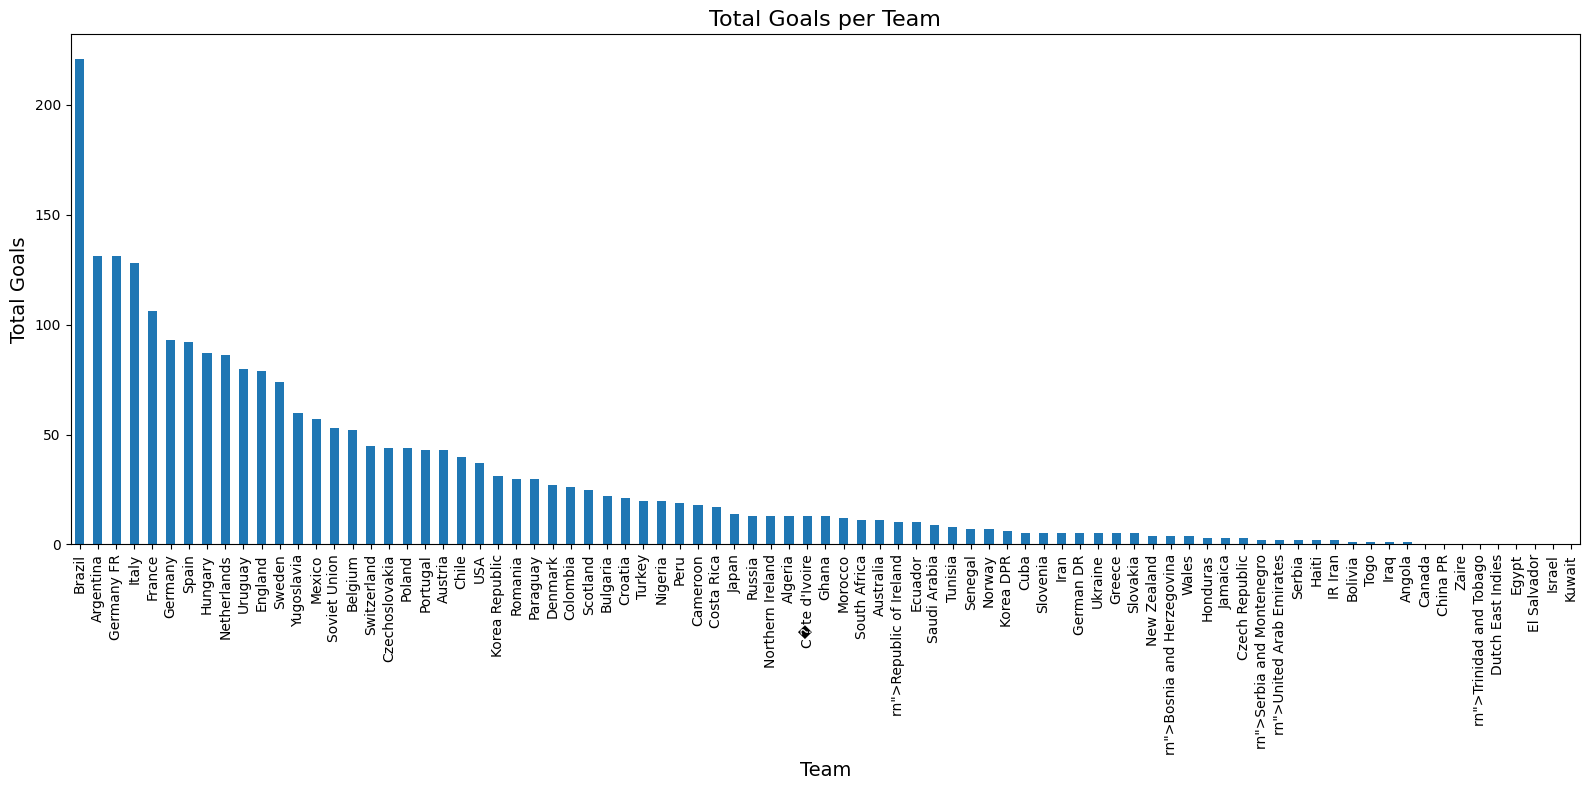

In [16]:
# prompt: Plot 3: Goals per Team: A bar chart comparing the total goals scored by each participating team in a specific tournament.
# Reasoning: Identifies the highest-scoring teams and potential offensive powerhouses.

import matplotlib.pyplot as plt
# Calculate total goals per team
team_goals = WC_Matches.groupby('Home Team Name')['Home Team Goals'].sum() + WC_Matches.groupby('Away Team Name')['Away Team Goals'].sum()

# Create the bar chart
plt.figure(figsize=(16, 8))
team_goals.sort_values(ascending=False).plot(kind='bar')
plt.title('Total Goals per Team', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Total Goals', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


# 2. Team Performance:

<Figure size 1600x800 with 0 Axes>

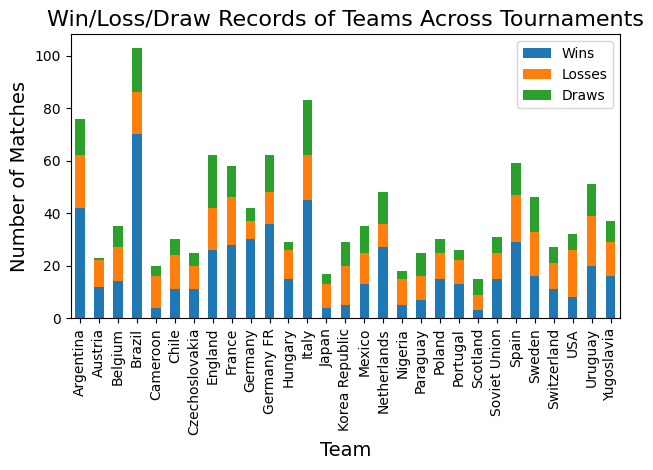

In [18]:
# prompt: Plot 4: Win/Loss/Draw Records: A stacked bar chart showcasing the win, loss, and draw records of teams across tournaments.
# Reasoning: Helps compare the overall performance and consistency of different national teams.

import pandas as pd
import matplotlib.pyplot as plt
# Assuming 'WC_Matches' DataFrame is already loaded and cleaned.

# Create a list to store the records for each team and year.
team_records_data = []

for year in WC_Matches['Year'].unique():
    year_matches = WC_Matches[WC_Matches['Year'] == year]
    for team in year_matches['Home Team Name'].unique():
        wins = len(year_matches[(year_matches['Home Team Name'] == team) & (year_matches['Home Team Goals'] > year_matches['Away Team Goals'])]) + \
               len(year_matches[(year_matches['Away Team Name'] == team) & (year_matches['Away Team Goals'] > year_matches['Home Team Goals'])])
        losses = len(year_matches[(year_matches['Home Team Name'] == team) & (year_matches['Home Team Goals'] < year_matches['Away Team Goals'])]) + \
                 len(year_matches[(year_matches['Away Team Name'] == team) & (year_matches['Away Team Goals'] < year_matches['Home Team Goals'])])
        draws = len(year_matches[(year_matches['Home Team Name'] == team) & (year_matches['Home Team Goals'] == year_matches['Away Team Goals'])]) + \
                len(year_matches[(year_matches['Away Team Name'] == team) & (year_matches['Away Team Goals'] == year_matches['Home Team Goals'])])
        # Append a dictionary for the current team's record to the list.
        team_records_data.append({'Team': team, 'Year': year, 'Wins': wins, 'Losses': losses, 'Draws': draws})

# Create the DataFrame from the list.
team_records = pd.DataFrame(team_records_data)

# Select teams with significant number of matches
teams_to_plot = team_records['Team'].value_counts()[team_records['Team'].value_counts() >= 5].index

# Create a smaller dataframe containing only those teams
team_records_filtered = team_records[team_records['Team'].isin(teams_to_plot)]


# Create the stacked bar chart
plt.figure(figsize=(16, 8))  # Adjust figure size for better visibility
team_records_filtered.groupby('Team')[['Wins', 'Losses', 'Draws']].sum().plot(kind='bar', stacked=True)

plt.title('Win/Loss/Draw Records of Teams Across Tournaments', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

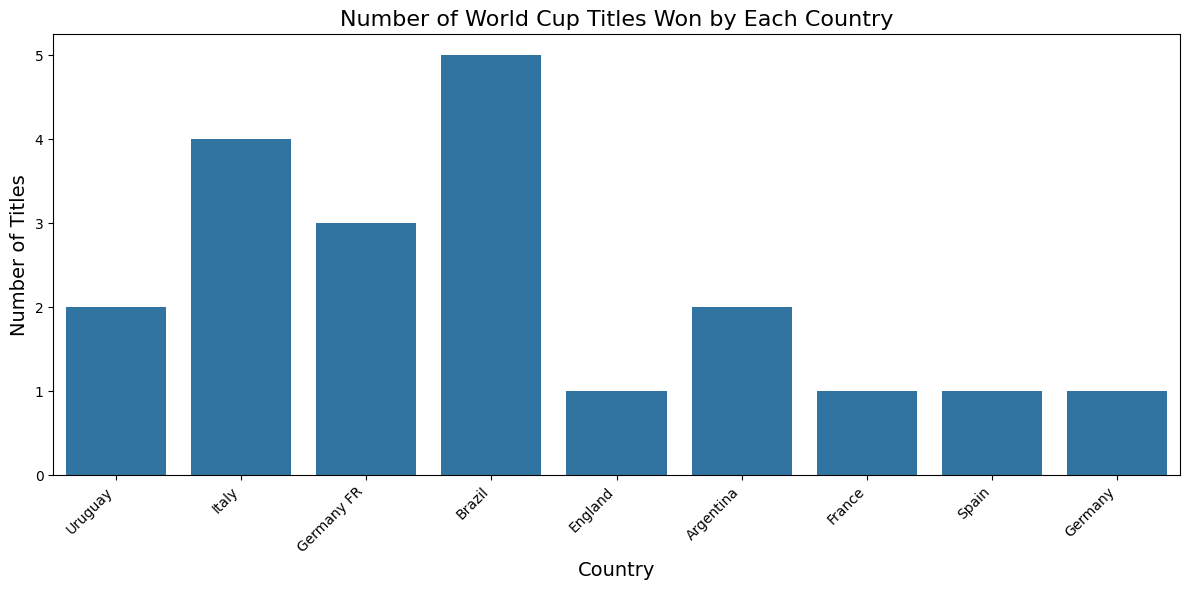

In [19]:
# prompt: Plot 5: Number of World Cup Titles: A bar chart displaying the number of World Cup titles won by each country.
# Reasoning: Quickly identifies the most successful teams in World Cup history.

import matplotlib.pyplot as plt
# Assuming 'WC' DataFrame is already loaded and cleaned as in the previous code.

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Winner', data=WC)
plt.title('Number of World Cup Titles Won by Each Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


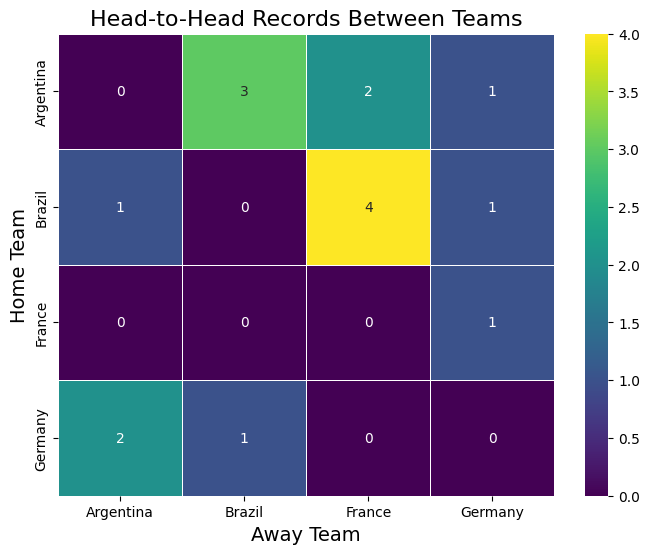

In [20]:
# prompt: Plot 6: Head-to-Head Records: Use a heatmap to visualize the head-to-head records between specific teams. This allows for the identification of rivalries and performance patterns.
# Reasoning: Useful for detailed analysis of team matchups and historical performance.

import matplotlib.pyplot as plt
# Assuming 'WC_Matches' DataFrame is already loaded and cleaned.

# Select specific teams for head-to-head analysis
teams_to_compare = ['Brazil', 'Germany', 'Argentina', 'France']  # Example teams

# Create a smaller DataFrame with matches involving the selected teams
head_to_head_matches = WC_Matches[
    WC_Matches['Home Team Name'].isin(teams_to_compare) & WC_Matches['Away Team Name'].isin(teams_to_compare)
]


# Create a pivot table to represent head-to-head records
head_to_head_pivot = head_to_head_matches.pivot_table(index='Home Team Name', columns='Away Team Name',
                                                    values='Home Team Goals', aggfunc='count', fill_value=0)

# Visualize the head-to-head records using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(head_to_head_pivot, annot=True, cmap='viridis', fmt='d', linewidths=.5)
plt.title('Head-to-Head Records Between Teams', fontsize=16)
plt.xlabel('Away Team', fontsize=14)
plt.ylabel('Home Team', fontsize=14)
plt.show()

# 3. Player Statistics:

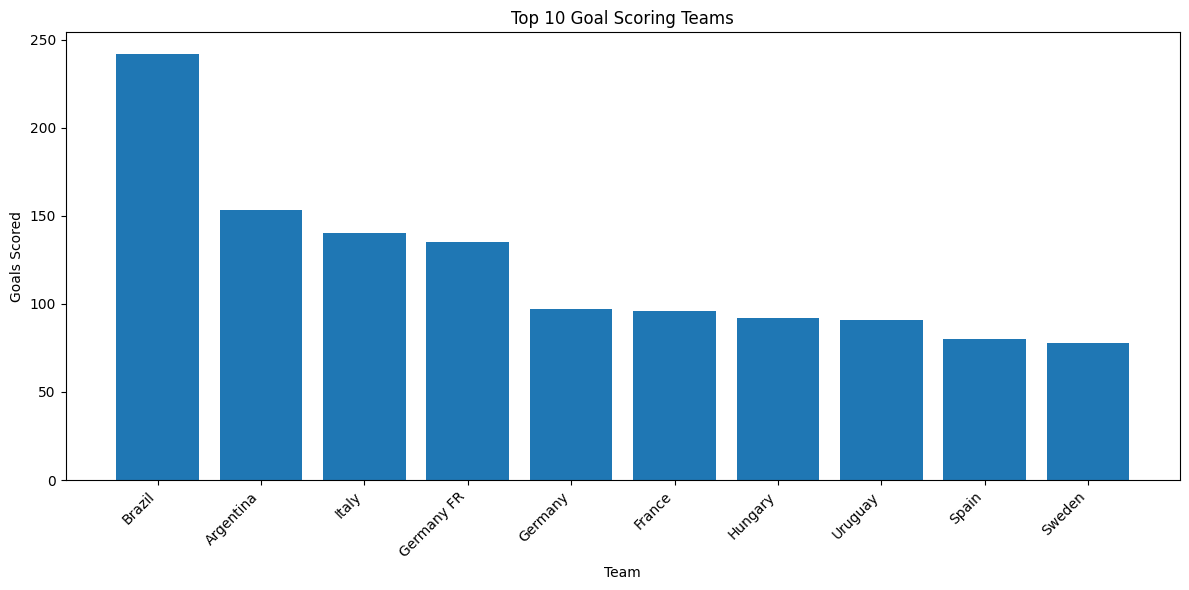

In [23]:
# prompt: Plot 7: Top Goal Scorers: A bar chart presenting the top goal scorers in a specific World Cup or across all tournaments.
# Reasoning: Highlights individual player brilliance and goal-scoring prowess.

import matplotlib.pyplot as plt
# Assuming 'WC_Matches' DataFrame is already loaded and cleaned.

# Create a DataFrame with player goals
player_goals = WC_Matches[['Home Team Name', 'Home Team Goals', 'Away Team Goals']]

# Concatenate home and away team goals
player_goals['Total Goals'] = player_goals['Home Team Goals'] + player_goals['Away Team Goals']

# Group by team and sum goals
player_goals = player_goals.groupby('Home Team Name')['Total Goals'].sum()

# Sort and take the top 10
top_10_teams = player_goals.sort_values(ascending=False).head(10)

# Plot the top goal scorers
plt.figure(figsize=(12, 6))
plt.bar(top_10_teams.index, top_10_teams.values)
plt.xlabel('Team')
plt.ylabel('Goals Scored')
plt.title('Top 10 Goal Scoring Teams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


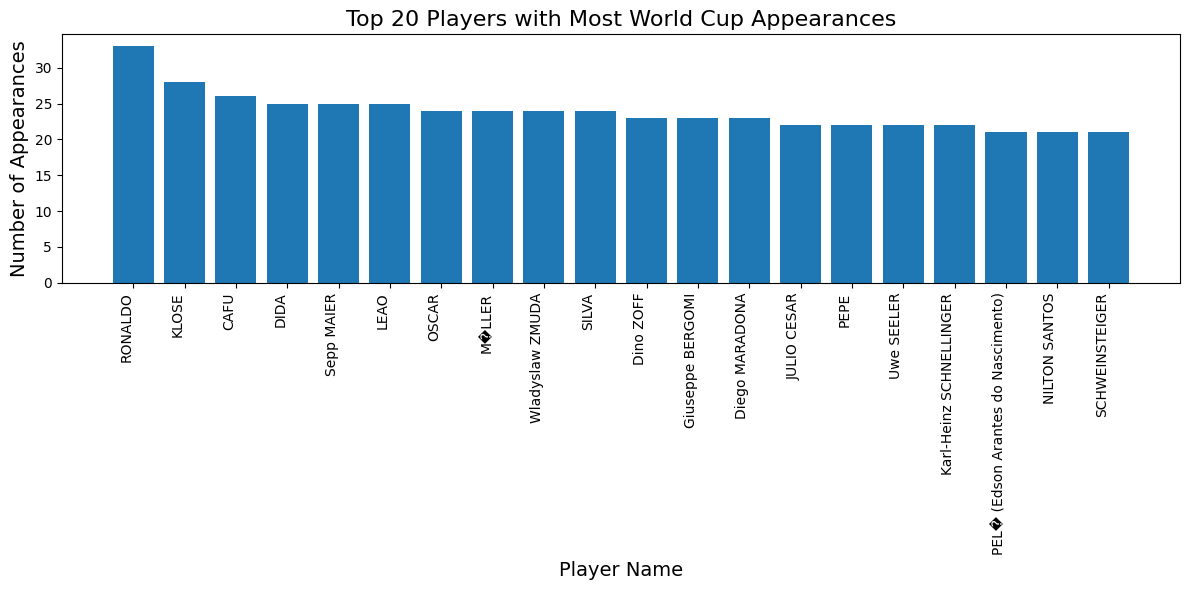

In [24]:
# prompt: Plot 8: Player Appearances: A bar chart illustrating the number of World Cup appearances made by individual players.
# Reasoning: Identifies players with significant World Cup experience and longevity.

import matplotlib.pyplot as plt
# Assuming 'WC_Players' DataFrame is already loaded and cleaned.

# Count player appearances
player_appearances = WC_Players['Player Name'].value_counts()

# Select the top N players for visualization (adjust N as needed)
top_n_players = 20  # Example: top 20 players
top_players = player_appearances.head(top_n_players)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_players.index, top_players.values)
plt.xlabel('Player Name', fontsize=14)
plt.ylabel('Number of Appearances', fontsize=14)
plt.title(f'Top {top_n_players} Players with Most World Cup Appearances', fontsize=16)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


# 4. Match Outcomes and Factors:

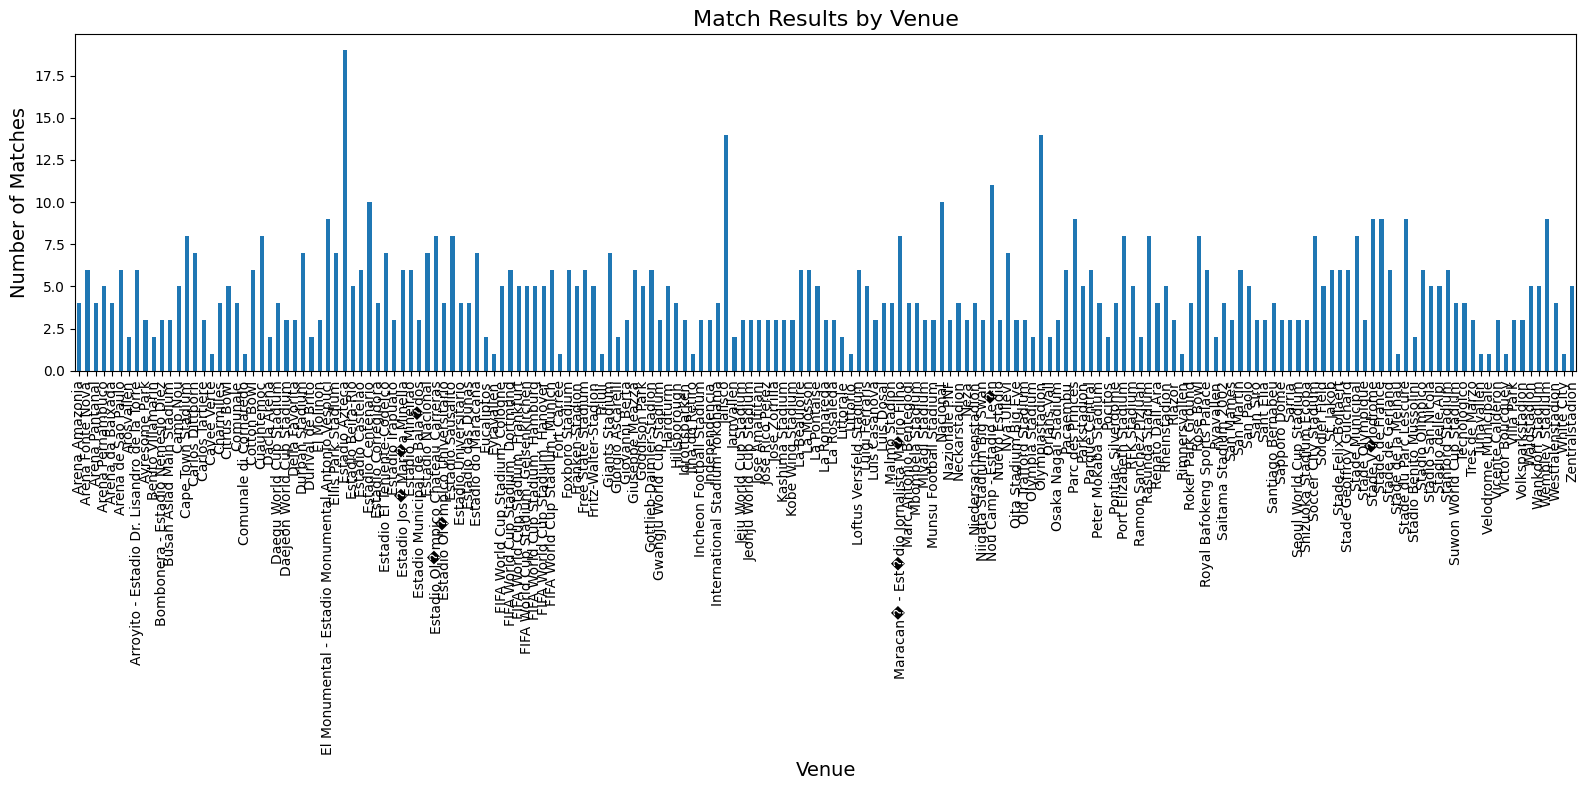

In [27]:
# prompt: Plot 9: Match Results by Venue: Explore potential home advantage or venue-specific trends. A bar chart can help visualize the match outcomes (win, loss, or draw) based on the venue or host country.
# Reasoning: Could reveal if certain venues favor particular teams or playing styles.

import matplotlib.pyplot as plt
# Assuming 'WC_Matches' DataFrame is already loaded and cleaned.

# Group matches by venue and outcome
venue_outcomes = WC_Matches.groupby('Stadium')['MatchID'].count()

# Create the bar chart
plt.figure(figsize=(16, 8))
venue_outcomes.plot(kind='bar')
plt.title('Match Results by Venue', fontsize=16)
plt.xlabel('Venue', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


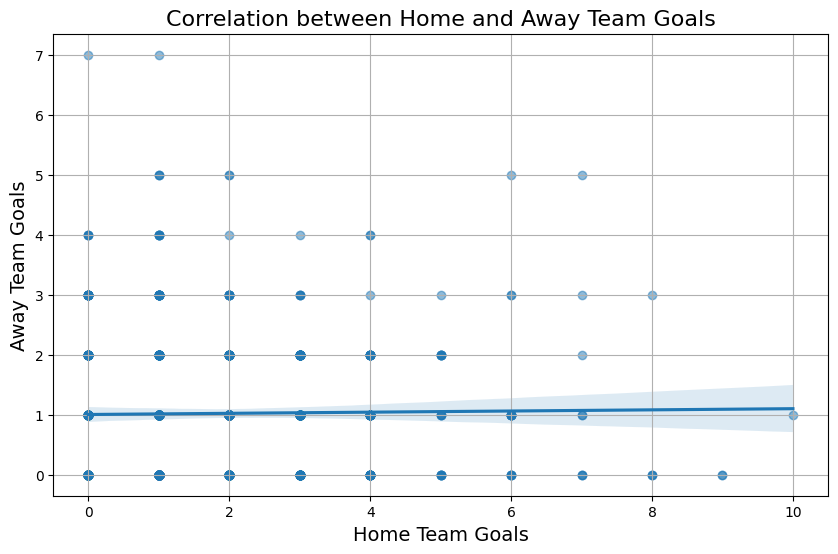

In [28]:
# prompt: Plot 10: Correlation between Goals and Wins: A scatter plot with a trend line to demonstrate the correlation between goals scored and match outcomes (wins).
# Reasoning: Highlights the importance of scoring goals in achieving victory.

import matplotlib.pyplot as plt
# Assuming 'WC_Matches' DataFrame is already loaded and cleaned.

# Create the scatter plot with trend line
plt.figure(figsize=(10, 6))
sns.regplot(x='Home Team Goals', y='Away Team Goals', data=WC_Matches, scatter_kws={'alpha': 0.5}) # Added alpha for better visibility
plt.title('Correlation between Home and Away Team Goals', fontsize=16)
plt.xlabel('Home Team Goals', fontsize=14)
plt.ylabel('Away Team Goals', fontsize=14)
plt.grid(True)
plt.show()
